# Imports

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Data

In [2]:
train = pd.read_csv('train_modified.csv')
holdout = pd.read_csv('holdout_modified.csv')

# Models

## Logistic regression

In [4]:
all_X = train.drop(['Survived','PassengerId'],axis=1)
all_y = train['Survived']

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy_lr = scores.mean()
accuracy_lr

0.823891442515038

## k-NN

In [6]:
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, all_X, all_y, cv=10)
accuracy_knn = scores.mean()
accuracy_knn

0.7857382816933379

In [7]:
def plot_dict(dictionary):
    pd.Series(dictionary).plot.bar(figsize=(9,6),
                                   ylim=(0.78,0.83),rot=0)
    plt.show()

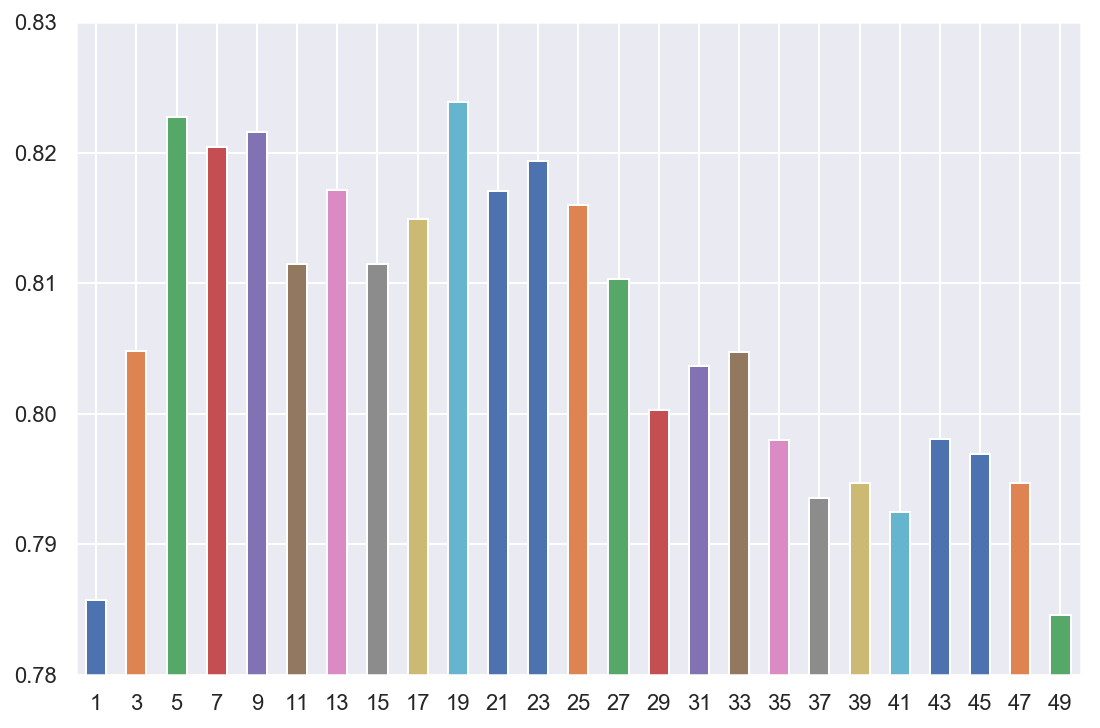

In [9]:
knn_scores = dict()
for k in range(1,50,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, all_X, all_y, cv=10)
    accuracy_knn = scores.mean()
    knn_scores[k] = accuracy_knn
plot_dict(knn_scores)

In [12]:
knn = KNeighborsClassifier()
hyperparameters = {
    "n_neighbors": range(1,20,2),
    "weights": ["distance", "uniform"],
    "algorithm": ['brute'],
    "p": [1,2]
}

grid = GridSearchCV(knn, param_grid=hyperparameters, cv=10)

grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_

print(best_params)
print(best_score)

{'algorithm': 'brute', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.8282828282828283


In [14]:
holdout_no_id = holdout.drop(['PassengerId'], axis=1)
best_knn = grid.best_estimator_

predictions = best_knn.predict(holdout_no_id)
submission = pd.DataFrame({
    "PassengerId": holdout["PassengerId"],
    "Survived": predictions
})

submission.to_csv("submission_1.csv", index=False)

## Random forest

In [19]:
clf = RandomForestClassifier(random_state=1)
scores = cross_val_score(clf, all_X, all_y, cv=10)
accuracy_rf = scores.mean()
accuracy_rf

0.8070125411417546

In [20]:
hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
}

clf = RandomForestClassifier(random_state=1)
grid = GridSearchCV(clf, param_grid=hyperparameters, cv=10)

grid.fit(all_X, all_y)

best_params = grid.best_params_
best_score = grid.best_score_

print(best_params)
print(best_score)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 9}
0.8428731762065096


In [21]:
best_rf = grid.best_estimator_
predictions = best_rf.predict(holdout_no_id)
submission = pd.DataFrame({
    "PassengerId": holdout["PassengerId"],
    "Survived": predictions
})

submission.to_csv("submission_2.csv", index=False)